# Classification of Iris dataset using Decision tree classifier

## By Sayan Hazra

This program uses a decision tree classifier to classify the Iris data set containing three types of species(classes). Each species has their own characteristics(Attributes) and the classifier is used to predict the species based on a particular set of attributes

#### Importing required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

#### Using the pandas library to import and process the Iris dataset

In [4]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Converting the string target(Species) to numerical categories

In [5]:
backup = {'Iris-setosa': 0, 'Iris-virginica':2, 'Iris-versicolor': 1 }
df['Species'] = df.Species.astype('category').cat.codes
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [6]:
y = df['Species']
X = df[:]

In [7]:
X = X.drop(['Id','Species'], axis = 1)

In [8]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Preparing the train and test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [10]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [11]:
y_train

137    2
84     1
27     0
127    2
132    2
      ..
9      0
103    2
67     1
117    2
47     0
Name: Species, Length: 120, dtype: int8

#### Creating the decision tree classifier from the sklearn library in python

In [12]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

#### Visualising the tree

In [13]:
from IPython.display import Image  
from sklearn.tree import export_graphviz, plot_tree
import pydotplus
import graphviz

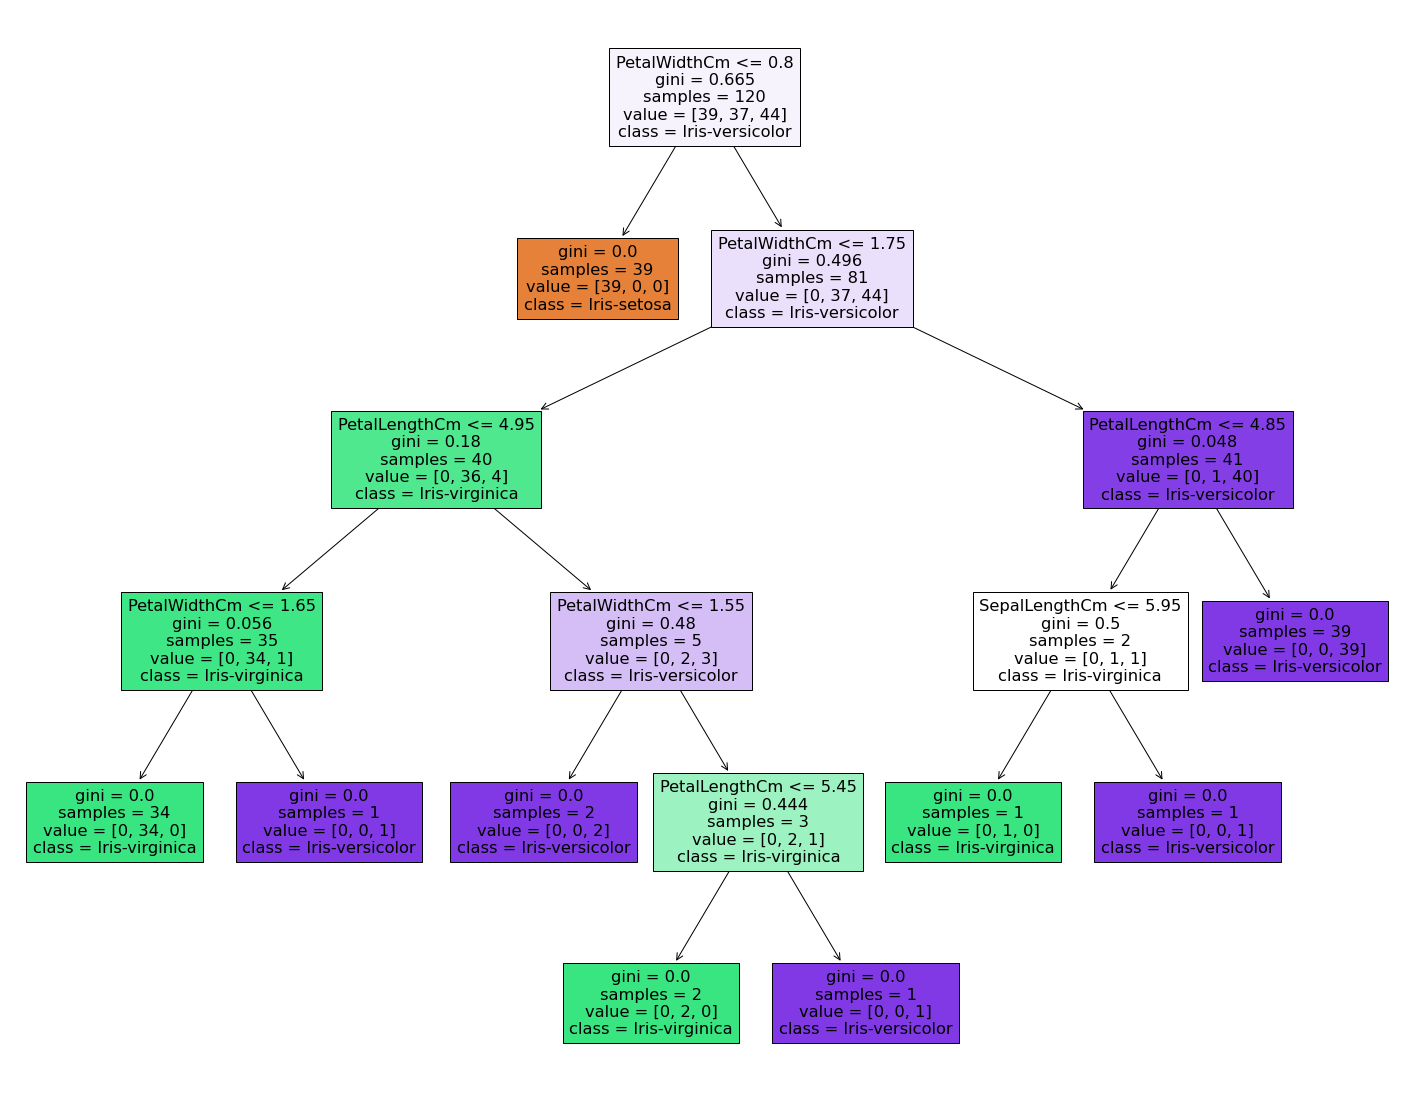

In [14]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtree, 
                   feature_names=['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm'],  
                   class_names=['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'],
                   filled=True)

### Prediction

Using the test set created before, testing the model

In [15]:
y_hat = dtree.predict(X_test)

In [16]:
def cat_Act(X, dt):
    t = [None]* len(X)
    print(len(X), len(t))
    for key,value in dt.items():
        for i in range(len(X)):
            if(X[i] == value):
                t[i] = key
    return t

In [17]:
y_test= y_test.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [18]:
Y_hat = cat_Act(y_hat, backup)
Y_test = cat_Act(y_test, backup)

30 30
30 30


In [19]:
res = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_hat})

In [20]:
res = pd.concat([X_test, res], axis=1)
res

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Actual,Predicted
0,5.8,2.8,5.1,2.4,Iris-virginica,Iris-virginica
1,6.0,2.2,4.0,1.0,Iris-versicolor,Iris-versicolor
2,5.5,4.2,1.4,0.2,Iris-setosa,Iris-setosa
3,7.3,2.9,6.3,1.8,Iris-virginica,Iris-virginica
4,5.0,3.4,1.5,0.2,Iris-setosa,Iris-setosa
5,6.3,3.3,6.0,2.5,Iris-virginica,Iris-virginica
6,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa
7,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-versicolor
8,6.8,2.8,4.8,1.4,Iris-versicolor,Iris-versicolor
9,6.1,2.8,4.0,1.3,Iris-versicolor,Iris-versicolor
